In [2]:
library(repr)
options(repr.plot.width = 6, repr.plot.height = 4)
options(repr.plot.res = 200)

library(ggplot2)
library(dplyr)

set.seed(1)

n <- 1000
sigma <- matrix(c(0.3, -0.5, -0.5, 1.6), nrow = 2)
mu <- c(-2, 1)


In [3]:
# 1.
x <- matrix(rnorm(2 * n), ncol = 2)


In [4]:
# 2.
lambda <- eigen(sigma)


In [5]:
# 3.
x2 <- t(diag(sqrt(lambda$values)) %*% t(x))


In [6]:
# 4.
x3 <- t(lambda$vectors %*% t(x2))


In [7]:
# 5.
x4 <- t(t(x3) + mu)


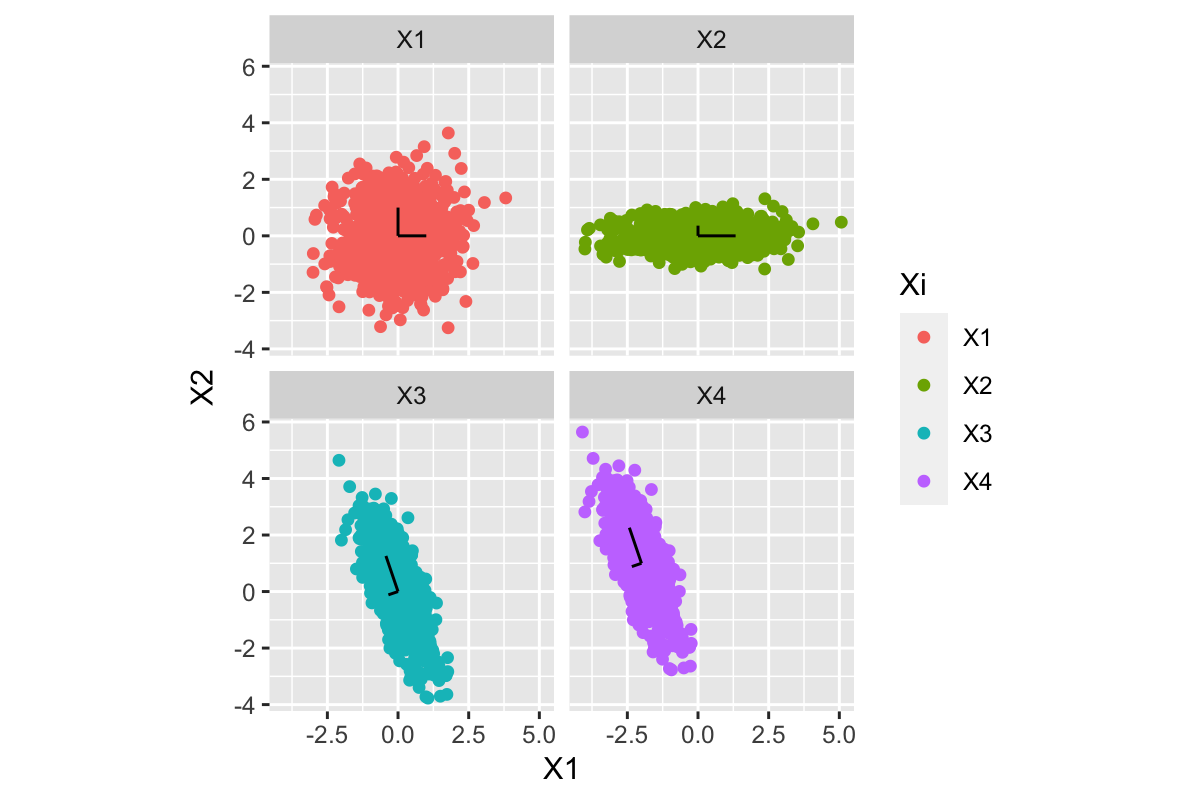

In [9]:
# Eigenvectors for plot
x_vec <- matrix(c(0, 0, 0, 0, 1, 0, 0, 1), nrow = 2)
x2_vec <- diag(sqrt(lambda$values)) %*% x_vec
x3_vec <- lambda$vectors %*% x2_vec
x4_vec <- x3_vec + mu

# Need to transpose to create xend and yend features by columns
x_vec <- cbind(t(x_vec[, 1:2]), t(x_vec[, 3:4]))
x2_vec <- cbind(t(x2_vec[, 1:2]), t(x2_vec[, 3:4]))
x3_vec <- cbind(t(x3_vec[, 1:2]), t(x3_vec[, 3:4]))
x4_vec <- cbind(t(x4_vec[, 1:2]), t(x4_vec[, 3:4]))

vectors <- bind_cols(
  data.frame(rbind(x_vec, x2_vec, x3_vec, x4_vec)),
  Xi = c(rep("X1", 2), rep("X2", 2), rep("X3", 2), rep("X4", 2))
)
bind_cols(
  data.frame(rbind(x, x2, x3, x4)),
  Xi = c(rep("X1", n), rep("X2", n), rep("X3", n), rep("X4", n))
) |>
  ggplot(aes(x = X1, y = X2, color = Xi)) +
  geom_point() +
  geom_segment(data = vectors, aes(xend = X3, yend = X4), color = "black") +
  facet_wrap(~Xi) +
  coord_fixed()
